In [1]:
%run "docker_extract.py"
# import sys
# sys.path.insert(0, ".")

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ipynb.fs.full.docker_extract import ExtractData 
from ipynb.fs.full.compute_statistics import Transformation 
# from docker_extract import ExtractData


parent_dir=os.path.dirname(os.getcwd())
data_extractor=ExtractData()
df=pd.read_csv(os.path.join(parent_dir,"test_dataframe.csv"),index_col=0)
old_cols=df.columns
df.dropna(how='all', axis=1, inplace=True)
df.drop(["match_id.1","has_stats"],axis=1,inplace=True)
df=df[df['outcome'] != "RET"]
df=df[(~df['surface'].isna()) | (~df['indoor'].isna())]
df.sort_values(by="date",inplace=True)


In [2]:
import numpy as np

print(df.shape)
data_trans = Transformation(df)
data_trans()
new_df=data_trans.get_dataframe()
# print(new_df.shape)
# new_df.drop(['w_1st_in','l_1st_in','w_sv_gm_lset','l_sv_gm_lset','w_ace_set','l_ace_set','w_df_set','l_df_set','w_r_gm_w_set','l_r_gm_w_set','w_bp_set','l_bp_set','w_bpf_set','l_bpf_set'],axis=1,inplace=True)
# new_df=new_df[~new_df.isin([np.nan, np.inf, -np.inf]).any(1)]
# new_df.dropna(inplace=True)
# new_df.sort_values(by=['date','match_id']).to_csv('stats_df.csv')
# display(new_df)

#sv is service--> Bal slaan
#sf is surface

(69594, 57)
180658


NameError: name 'sys' is not defined

In [3]:
for column in new_df.columns:
    print(column)
    print(new_df[column].describe())
    print()

match_id
count     34330.000000
mean     126890.479814
std       28522.427189
min       80994.000000
25%      102665.500000
50%      122811.500000
75%      152639.500000
max      180760.000000
Name: match_id, dtype: float64

l_sf_rank
count    34330.000000
mean        60.024264
std         39.981431
min          1.000000
25%         28.000000
50%         53.000000
75%         86.000000
max        198.000000
Name: l_sf_rank, dtype: float64

l_sf_elo
count    34330.000000
mean      1933.097000
std        128.095048
min       1509.000000
25%       1846.000000
50%       1921.000000
75%       2006.000000
max       2670.000000
Name: l_sf_elo, dtype: float64

l_i_o_rank
count    34330.000000
mean        67.429187
std         45.814099
min          1.000000
25%         31.000000
50%         59.000000
75%         95.000000
max        200.000000
Name: l_i_o_rank, dtype: float64

l_i_o_elo_rank
count    34330.000000
mean      1920.164754
std        120.134176
min       1505.000000
25%       1835.

/var/folders/f0/w2rx57_n78d55m07x7v_fsr40000gn/T/ipykernel_27769/3190524430.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(new_df[column].describe())


count    34330.000000
mean         0.750603
std          0.081260
min          0.391304
25%          0.694444
50%          0.750000
75%          0.806452
max          1.000000
Name: w_1st_w, dtype: float64

l_1st_w
count    34330.000000
mean         0.651338
std          0.098083
min          0.055556
25%          0.588235
50%          0.654545
75%          0.718750
max          1.000000
Name: l_1st_w, dtype: float64

w_2nd_w
count    34330.000000
mean         0.550775
std          0.098268
min          0.111111
25%          0.484848
50%          0.548387
75%          0.615385
max          1.000000
Name: w_2nd_w, dtype: float64

l_2nd_w
count    34330.000000
mean         0.448094
std          0.100895
min          0.041667
25%          0.384615
50%          0.450000
75%          0.516129
max          0.941176
Name: l_2nd_w, dtype: float64

w_bp_save
count    34330.000000
mean         0.650785
std          0.278819
min          0.000000
25%          0.500000
50%          0.666667
75%   

In [4]:
print(new_df[new_df['w_br_ratio'].isna()][['w_br_ratio',]])
print(new_df.isna().sum().sort_values())

NameError: name 'new_df' is not defined

<AxesSubplot:>

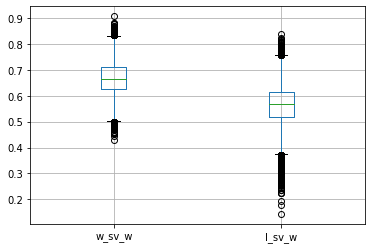

In [5]:
new_df.boxplot(['w_sv_w','l_sv_w'])

In [3]:
data_extractor.get_match_details(180658)

,outcome,match_id,date,first_name,last_name,first_name,last_name
0,None,180658,2003-10-13,Feliciano,Lopez,Mariano,Zabaleta


In [7]:
import researchpy as rp

def ttest(column):
    return rp.ttest(group1=new_df["w"+column], group1_name= "Winner",
                    group2=new_df["l"+column], group2_name= "Loser")

In [8]:
columns=[column[1:] for column in new_df.columns if "w_" in column]

ttest_df=pd.DataFrame([])

for column in columns:
    data=[column[1:]]
    result=ttest(column)
    data.append(str(int(result[0]['N'][0])))
    data.append(str(round(result[0]['Mean'][0],2)))
    data.append(str(round(result[0]['Mean'][1],2)))
    data.append(str(round(result[1].iloc[0][1],2)))
    data.append(str(result[1].iloc[4][1]))
    data.append(str(result[1].iloc[5][1]))
    ttest_df=ttest_df.append(pd.Series(data),ignore_index=True)

ttest_df.columns=['Variable','N','Mean Winner','Mean Loser','Difference','Dif. < 0 p value','Dif. > 0 p value']
display(ttest_df)





,Variable,N,Mean Winner,Mean Loser,Difference,Dif. < 0 p value,Dif. > 0 p value
0,sf_rank,34330,43.97,60.02,-16.06,0.0,1.0
1,sf_elo,34330,1999.44,1933.1,66.34,1.0,0.0
2,i_o_rank,34330,49.82,67.43,-17.61,0.0,1.0
3,i_o_elo_rank,34330,1980.97,1920.16,60.8,1.0,0.0
4,rank,34330,47.87,64.09,-16.21,0.0,1.0
5,elo_r,34330,1988.52,1930.15,58.37,1.0,0.0
6,ace,34330,0.08,0.05,0.02,1.0,0.0
7,df,34330,0.04,0.05,-0.01,0.0,1.0
8,tt_p,34330,0.55,0.45,0.1,1.0,0.0
9,sv_w,34330,0.67,0.56,0.1,1.0,0.0


In [9]:
from scipy.stats import chi2_contingency
import seaborn as sns
from tqdm import tqdm
def ch_calculate(df):
    factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

    chi2, p_values =[], []

    for f in tqdm(factors_paired):
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)

    chi2 = np.array(chi2).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
    return chi2
    

chi_square=ch_calculate(new_df[[i for i in new_df.columns if "w_" in i]])

  1%|▏         | 16/1156 [00:03<03:52,  4.89it/s]


KeyboardInterrupt: 

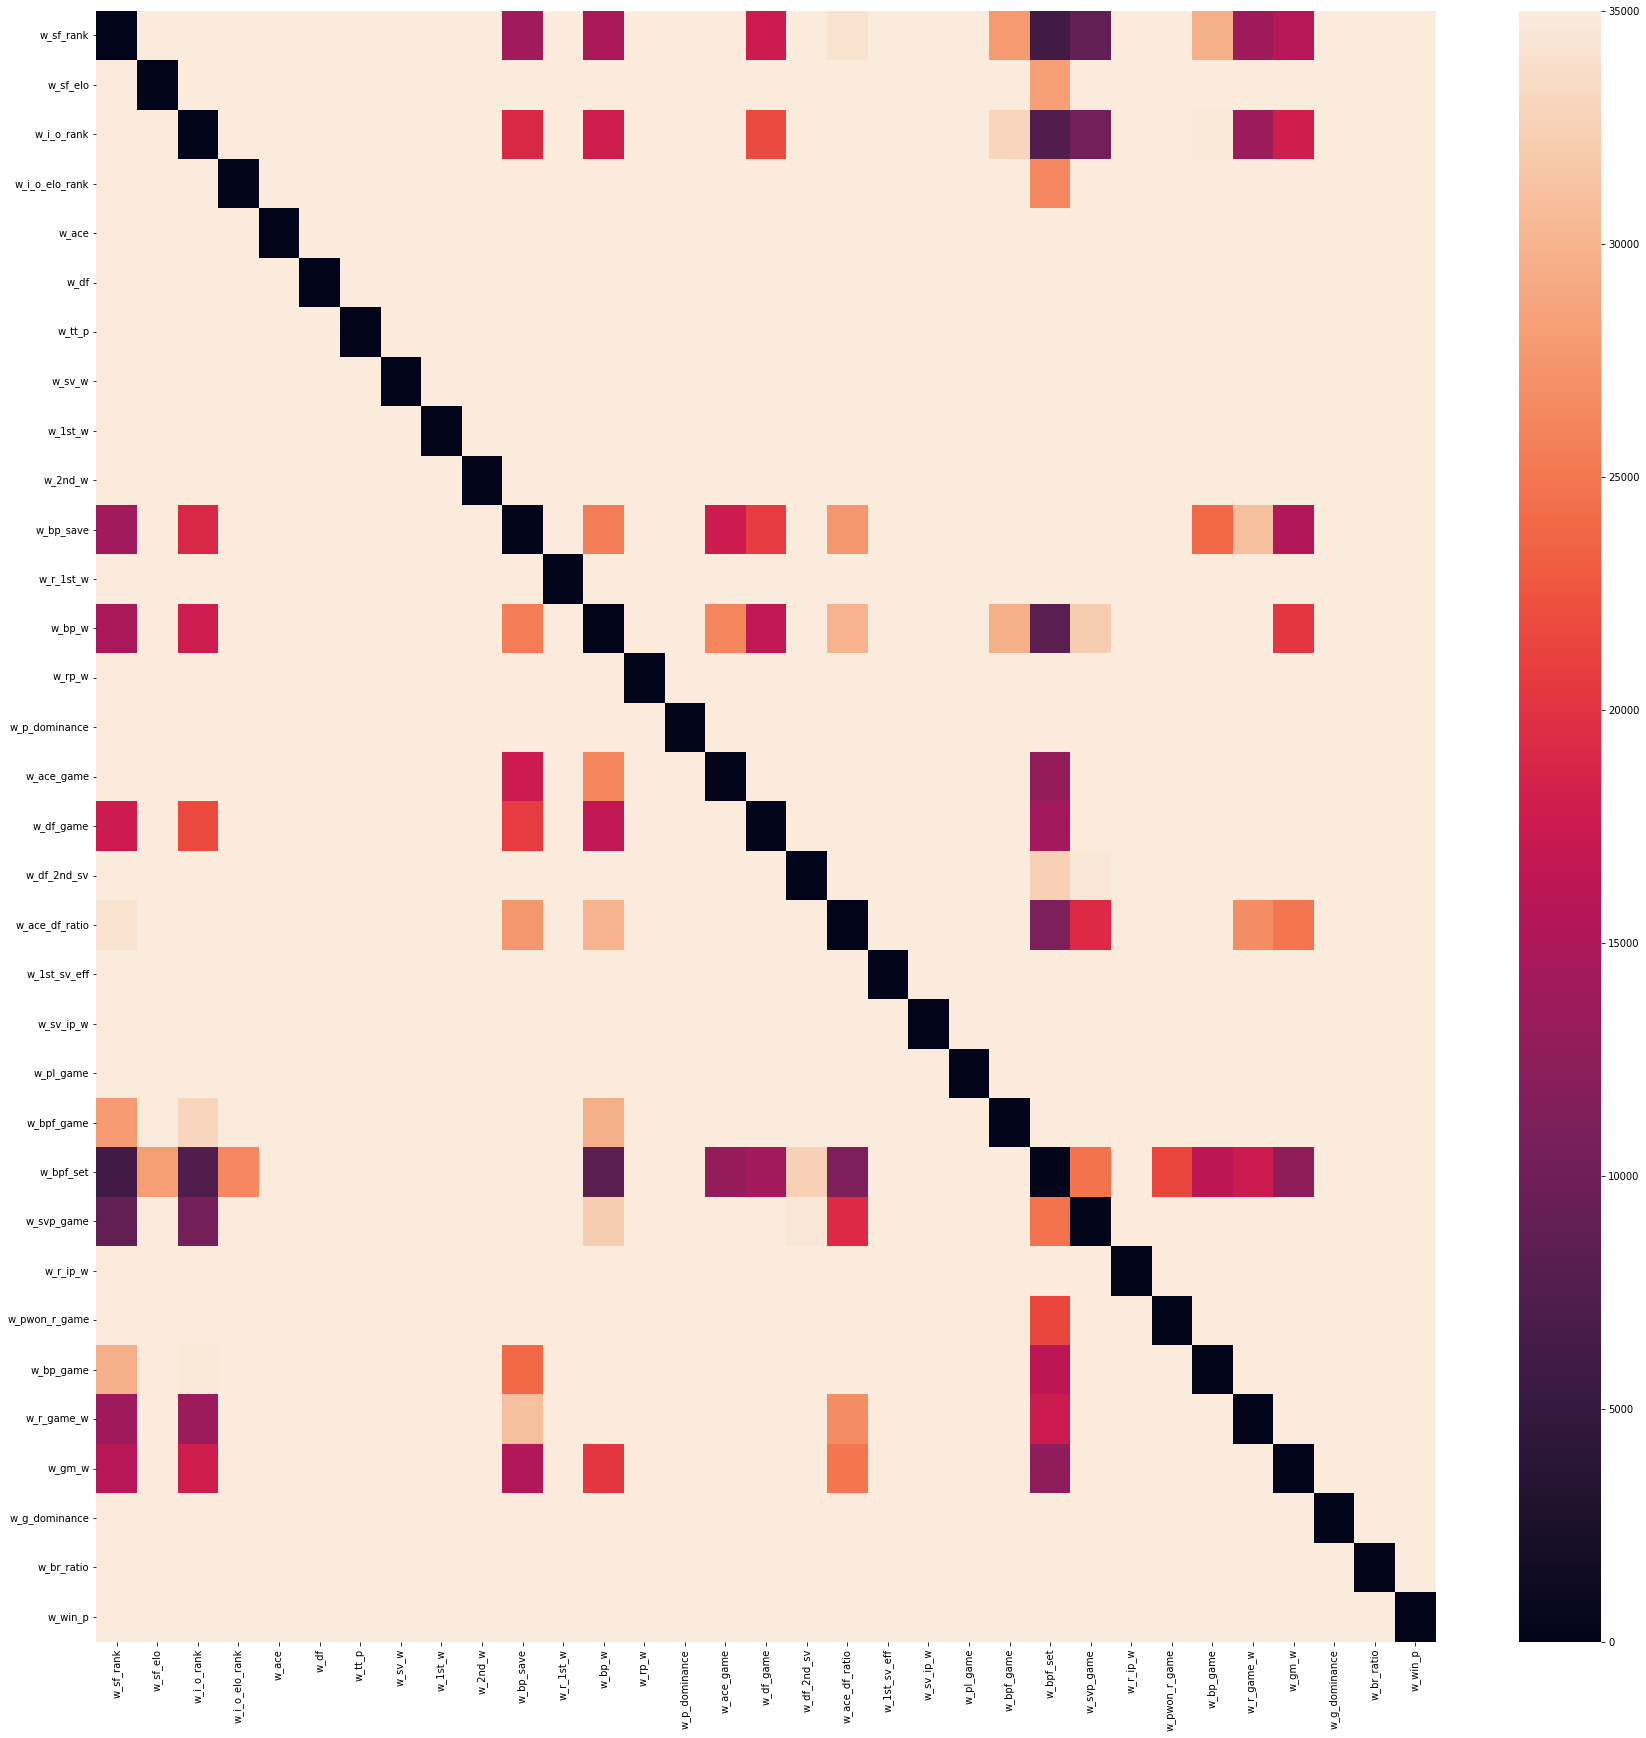

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(chi_square,vmin=0, vmax=35000)
plt.show()